In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import config
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

tf.compat.v1.keras.backend.set_session(config.SESS)

1 Physical GPUs, 1 Logical GPUs
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5



In [4]:
import os
import wget
URL = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt'
DOWNLOAD_PATH = '/tmp/irish-lyrics-eof.txt'

if not os.path.exists(DOWNLOAD_PATH):
    wget.download(URL, DOWNLOAD_PATH)

In [6]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
print(total_words)

2690


In [8]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [13]:
print(xs[5])
print(ys[5])
print(len(ys))
print(tokenizer.word_index)

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]
12038
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80,

In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 3s 7ms/step - loss: 6.6532 - accuracy: 0.0753
Epoch 2/100
377/377 [==============================] - 3s 7ms/step - loss: 5.7665 - accuracy: 0.1127
Epoch 3/100
377/377 [==============================] - 3s 7ms/step - loss: 4.8471 - accuracy: 0.1682
Epoch 4/100
377/377 [==============================] - 3s 7ms/step - loss: 3.8973 - accuracy: 0.2392
Epoch 5/100
377/377 [==============================] - 3s 7ms/step - loss: 3.0288 - accuracy: 0.3521
Epoch 6/100
377/377 [==============================] - 3s 7ms/step - loss: 2.3607 - accuracy: 0.4592
Epoch 7/100
377/377 [==============================] - 3s 7ms/step - loss: 1.8989 - accuracy: 0.5562
Epoch 8/100
377/377 [==============================] - 3s 7ms/step - loss: 1.6310 - accuracy: 0.6097
Epoch 9/100
377/377 [==============================] - 3s 7ms/step - loss: 1.3690 - accuracy: 0.6700
Epoch 10/100
377/377 [==============================] - 3s 7ms/step - loss: 1.1964 - accura

377/377 [==============================] - 3s 7ms/step - loss: 0.9112 - accuracy: 0.7650
Epoch 82/100
377/377 [==============================] - 3s 7ms/step - loss: 0.8368 - accuracy: 0.7803
Epoch 83/100
377/377 [==============================] - 3s 7ms/step - loss: 0.7977 - accuracy: 0.7944
Epoch 84/100
377/377 [==============================] - 3s 7ms/step - loss: 0.8152 - accuracy: 0.7888
Epoch 85/100
377/377 [==============================] - 3s 7ms/step - loss: 0.8544 - accuracy: 0.7816
Epoch 86/100
377/377 [==============================] - 3s 7ms/step - loss: 0.9063 - accuracy: 0.7662
Epoch 87/100
377/377 [==============================] - 3s 7ms/step - loss: 0.9362 - accuracy: 0.7584
Epoch 88/100
377/377 [==============================] - 3s 7ms/step - loss: 0.9250 - accuracy: 0.7598
Epoch 89/100
377/377 [==============================] - 3s 8ms/step - loss: 0.9083 - accuracy: 0.7659
Epoch 90/100
377/377 [==============================] - 3s 7ms/step - loss: 0.9445 - accuracy: 

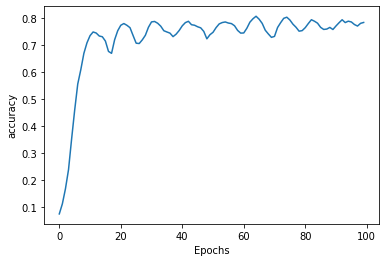

In [15]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [16]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this noon the night unseen joy fade sitting dawning day thy more colleen turns brown entwine itself verdantly still maiden thoughts have till summers day i wander where mary on your lip an look so fine summers very heavens never ever a teardrop should said now fine catchers daughter in the guard getting late i love best games mary in answer like by me tell me by far away oer the side ye look so sweet wives why leave in your hapless breast for the table loves it now died satisfied she answered with easy lie by aisey eileen give your
